<center>
<strong><b><font size="5">Time Series 03 ~ Darts Time Series Forecasting II</font></b></strong>
<img alt="" src="images/covers/taudata-cover.jpg"/>
</center>

In [2]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab
    IN_COLAB = True
    !mkdir data models images
    !pip install darts ipywidgets utils --q
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded


In [3]:
%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from tqdm import tqdm
from darts import TimeSeries
from darts.datasets import AirPassengersDataset

seed = 404
np.random.seed(seed)
"Done"

'Done'

# <center>Univariate VS Multivariate VS Multiple Time Series</center>

### **Pembedaan antara Deret Univariat dan Multivariat**  

1. **Deret Multivariat**  
   - Berisi banyak dimensi (yakni, beberapa nilai untuk setiap langkah waktu).  
   - Semua komponen dalam deret multivariat berbagi sumbu waktu yang sama, yaitu memiliki stempel waktu yang sama.  

2. **Deret Univariat**  
   - Berisi hanya satu dimensi (yakni, satu nilai skalar untuk setiap langkah waktu).  
   - Dalam konteks objek **TimeSeries**, deret ini hanya memiliki satu komponen.  

### Komponen dalam Deret Waktu  
- Dimensi dalam deret waktu sering disebut **komponen**.  
- **TimeSeries** dapat berupa:  
  - Univariat (satu komponen).  
  - Multivariat (beberapa komponen).  

### Dukungan Model dalam Darts
1. **Model Multivariat**  
   - Beberapa model dalam Darts (termasuk semua model berbasis *machine learning*) mendukung deret multivariat.  
   - Model ini dapat menerima deret multivariat sebagai masukan (baik sebagai target maupun *covariates*), dan prediksi yang dihasilkan akan memiliki dimensi yang sesuai dengan target.  

2. **Model dengan Panel Data**  
   - Beberapa model dapat bekerja dengan beberapa deret waktu sekaligus (*multiple TimeSeries objects*).  
   - Dalam kasus ini:  
     - Deret waktu yang berbeda tidak harus memiliki indeks waktu yang sama.  
     - Frekuensi antar deret waktu juga tidak harus sama.  
   - Model ini memerlukan input berupa urutan Python (*Python Sequences*) dari objek **TimeSeries** (misalnya, daftar sederhana dari beberapa **TimeSeries**).  

Pendekatan ini sangat fleksibel dan memungkinkan analisis data panel, seperti deret waktu dari periode atau lokasi yang berbeda, dengan tetap menjaga efisiensi model.

<center><img alt="" src="images/timeseries/univariate-multivariate-multiple-timeseries.png"/></center>

### **Contoh Deret Multivariat:**  
Tekanan darah dan detak jantung dari satu pasien yang diukur sepanjang waktu. Dalam kasus ini:  
- **Deret waktu multivariat** memiliki **2 komponen**: tekanan darah dan detak jantung.  
- Semua pengamatan memiliki stempel waktu yang sama untuk pasien tersebut.

**Contoh Banyak Deret Waktu (multiple):**  
Tekanan darah dan detak jantung dari beberapa pasien yang mungkin diukur pada waktu yang berbeda untuk setiap pasien. Dalam kasus ini:  
- Setiap pasien memiliki **satu deret waktu multivariat** dengan **2 komponen**: tekanan darah dan detak jantung.  
- Waktu pengamatan antar pasien tidak harus sama, dan frekuensinya juga dapat berbeda.  

### Perbedaan Utama  
- **Deret Multivariat:** Semua data berbagi sumbu waktu yang sama.  
- **Banyak Deret Waktu (multiple):** Terdiri dari beberapa deret waktu, di mana masing-masing deret dapat memiliki indeks waktu atau frekuensi yang berbeda.  

Pendekatan ini memungkinkan fleksibilitas dalam menganalisis data individu maupun kelompok dalam berbagai konteks medis atau lainnya.

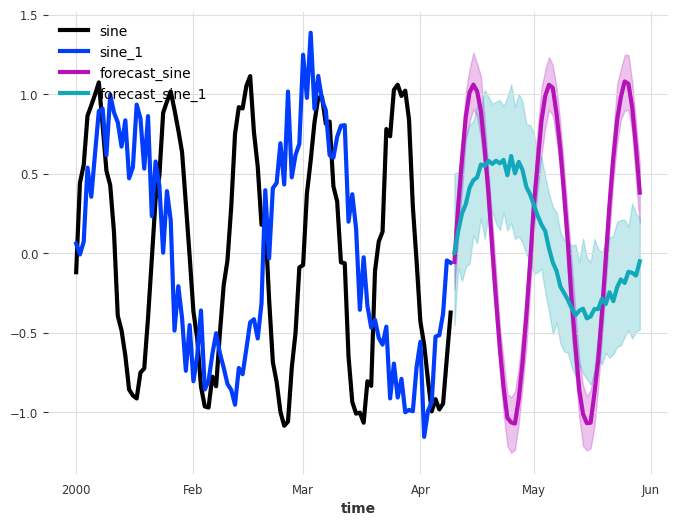

In [4]:
# Example Multivariate Time Series
import darts.utils.timeseries_generation as tg
from darts.models import KalmanForecaster
import matplotlib.pyplot as plt

series1 = tg.sine_timeseries(value_frequency=0.05, length=100) + 0.1 * tg.gaussian_timeseries(length=100)
series2 = tg.sine_timeseries(value_frequency=0.02, length=100) + 0.2 * tg.gaussian_timeseries(length=100)

multivariate_series = series1.stack(series2)

model = KalmanForecaster(dim_x=4)
model.fit(multivariate_series)
pred = model.predict(n=50, num_samples=100)

plt.figure(figsize=(8,6))
multivariate_series.plot(lw=3).figure
pred.plot(lw=3, label='forecast').figure
plt.show()

# <center>Probabilistic and deterministic series </center>

In Darts, probabilistic forecasts are represented by drawing Monte Carlo samples from the underlying probabilistic models. This representation allows TimeSeries to represent arbitrary joint distributions (over time and components) without relying on any pre-defined parametric form. Based on this, we define two types of time series:

* A Probabilistic (or stochastic) series contains multiple samples.
* A deterministic series contains only one sample.

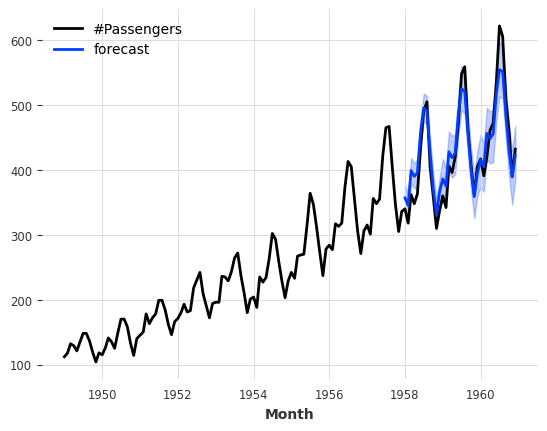

In [8]:
from darts.datasets import AirPassengersDataset
from darts import TimeSeries
from darts.models import ExponentialSmoothing

series = AirPassengersDataset().load()
train, val = series[:-36], series[-36:]

model = ExponentialSmoothing()
model.fit(train)
pred = model.predict(n=36, num_samples=500)

series.plot().figure
pred.plot(label='forecast').figure
plt.show()

In [6]:
pred.shape

(36, 1, 5)

In [9]:
pred[:5]

<TimeSeries (DataArray) (Month: 5, component: 1, sample: 500)> Size: 20kB
array([[[377.55966395, 361.92052095, 368.55483413, ..., 351.43562813,
         345.65870018, 356.43938295]],

       [[355.27803337, 346.57719109, 361.20386123, ..., 345.42209389,
         329.73506764, 341.48978525]],

       [[411.1786165 , 409.91933183, 399.75511647, ..., 394.59719065,
         380.03416351, 396.07151371]],

       [[398.1105826 , 392.40965602, 398.82915453, ..., 390.09187917,
         367.7723762 , 373.57811809]],

       [[386.57387452, 379.98147881, 402.59906711, ..., 407.91527096,
         391.43985394, 379.82692617]]])
Coordinates:
  * Month      (Month) datetime64[ns] 40B 1958-01-01 1958-02-01 ... 1958-05-01
  * component  (component) object 8B '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

# Contoh Lain

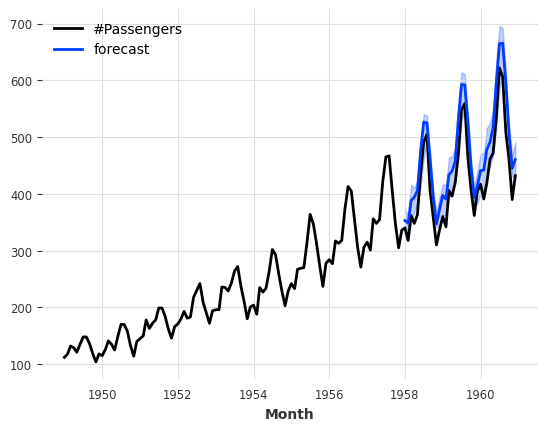

In [18]:
from darts.datasets import AirPassengersDataset
from darts import TimeSeries
from darts.models import LinearRegressionModel

series = AirPassengersDataset().load()
train, val = series[:-36], series[-36:]

model = LinearRegressionModel(lags=30,
                              likelihood="quantile",
                              quantiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])
model.fit(train)
pred = model.predict(n=36, num_samples=500)

series.plot().figure
pred.plot(label='forecast').figure
plt.show()

In [19]:
pred[:5]

<TimeSeries (DataArray) (Month: 5, component: 1, sample: 500)> Size: 20kB
array([[[358.49156814, 357.96883457, 354.40322108, ..., 318.32213556,
         350.13858199, 336.92496247]],

       [[344.14381321, 352.10664023, 357.3918319 , ..., 350.24068418,
         346.5503753 , 357.89172944]],

       [[392.34156449, 407.23796717, 392.21993044, ..., 395.4869141 ,
         381.83194644, 416.59284439]],

       [[399.4246646 , 402.02086387, 389.31635637, ..., 363.7860579 ,
         390.59632514, 401.13117974]],

       [[401.44772057, 404.54369387, 403.24880456, ..., 388.49396425,
         408.06376436, 408.51984774]]])
Coordinates:
  * Month      (Month) datetime64[ns] 40B 1958-01-01 1958-02-01 ... 1958-05-01
  * component  (component) object 8B '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

# Contoh Multiple TimeSeries Prediction

* https://unit8co.github.io/darts/examples/01-multi-time-series-and-covariates.html

In [10]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import torch

from darts import concatenate
from darts.dataprocessing.transformers import Scaler
from darts.datasets import AirPassengersDataset, ElectricityDataset, MonthlyMilkDataset
from darts.metrics import mae, mape
from darts.models import (
    VARIMA,
    BlockRNNModel,
    NBEATSModel,
    RNNModel,
)
from darts.utils.callbacks import TFMProgressBar
from darts.utils.timeseries_generation import (
    datetime_attribute_timeseries,
    sine_timeseries,
)
logging.disable(logging.CRITICAL)

%matplotlib inline

# for reproducibility
torch.manual_seed(1); np.random.seed(1)


def generate_torch_kwargs():
    # run torch models on CPU, and disable progress bars for all model stages except training.
    return { "pl_trainer_kwargs": {
            "accelerator": "cpu",
            "callbacks": [TFMProgressBar(enable_train_bar_only=True)], } }
"Done"

'Done'

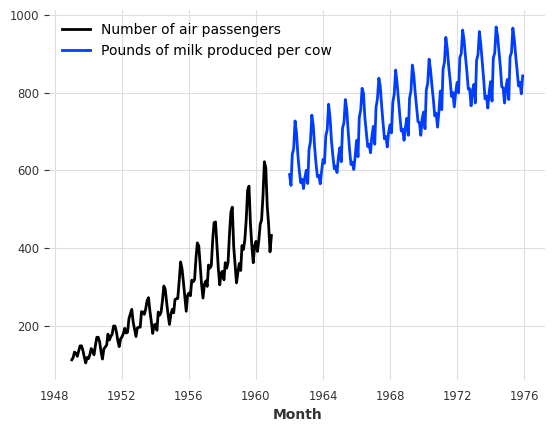

In [13]:
series_air = AirPassengersDataset().load()
series_milk = MonthlyMilkDataset().load()

series_air.plot(label="Number of air passengers").figure
series_milk.plot(label="Pounds of milk produced per cow").figure
plt.legend(); plt.show()

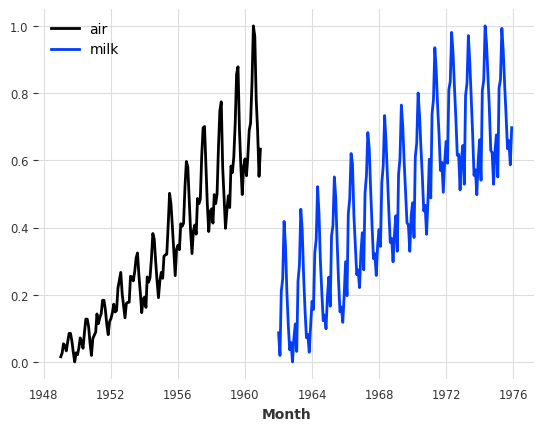

In [14]:
scaler_air, scaler_milk = Scaler(), Scaler()
series_air_scaled = scaler_air.fit_transform(series_air)
series_milk_scaled = scaler_milk.fit_transform(series_milk)

series_air_scaled.plot(label="air").figure
series_milk_scaled.plot(label="milk").figure
plt.legend();plt.show()

# Train-Test Split

In [15]:
train_air, val_air = series_air_scaled[:-36], series_air_scaled[-36:]
train_milk, val_milk = series_milk_scaled[:-36], series_milk_scaled[-36:]
train_air.shape, val_air.shape, train_milk.shape, val_milk.shape

((108, 1, 1), (36, 1, 1), (132, 1, 1), (36, 1, 1))

# One Series

In [16]:
model_air = NBEATSModel(
    input_chunk_length=24,
    output_chunk_length=12,
    n_epochs=200,
    random_state=0,
    **generate_torch_kwargs(),
)

Training: 0it [00:00, ?it/s]

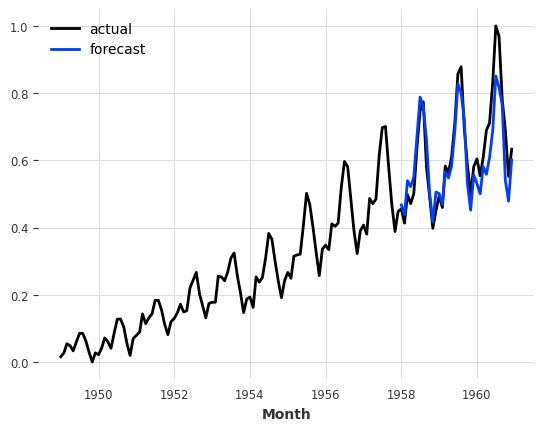

MAPE = 8.02%


In [33]:
model_air.fit(train_air)
pred = model_air.predict(n=36)

series_air_scaled.plot(label="actual").figure
pred.plot(label="forecast").figure
plt.legend(); plt.show()
print(f"MAPE = {mape(series_air_scaled, pred):.2f}%")

# Multiple Series

In [34]:
model_air_milk = NBEATSModel(
    input_chunk_length=24,
    output_chunk_length=12,
    n_epochs=100,
    random_state=0,
    **generate_torch_kwargs(),
)

Training: 0it [00:00, ?it/s]

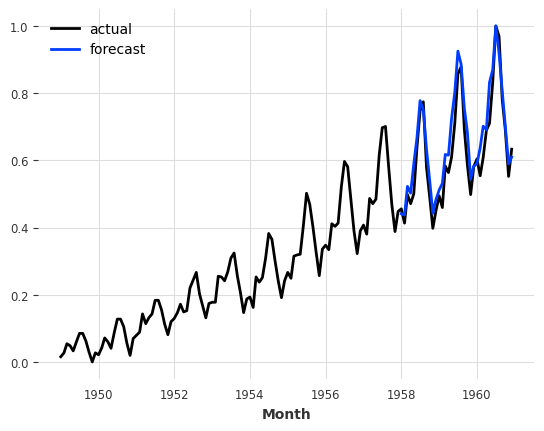

MAPE = 7.58%


In [35]:
model_air_milk.fit([train_air, train_milk])
pred = model_air_milk.predict(n=36, series=train_air)

series_air_scaled.plot(label="actual").figure
pred.plot(label="forecast").figure
plt.legend(); plt.show()
print(f"MAPE = {mape(series_air_scaled, pred):.2f}%")